# 1) Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

# 2) Pre Processing

In [3]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

As shown above, the number of rows (samples) is 100 and number of columns (variables) is 12. There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable.

In [4]:
miss_val = df.isnull().sum()/len(df)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("# Missing values in variable smoking_status\t: {:.2f}%".format(miss_val['smoking_status']))
print("Data shape: {}".format(df.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
# Missing values in variable smoking_status	: 0.00%
Data shape: (5110, 12)


There are two variables that contain missing values. First, 'bmi' that accounts for 3.37% of overal samples; second, 'smoking_status' that accounts for 30.63% of overall samples. To handle these missing values, we will remove the samples from all the variables associated with the indices of missing values in 'smoking_status'. For missing values in 'bmi' variable, we will replace them with the average of 'bmi' values.

In [5]:
df = df.drop(df.loc[df['smoking_status']=='Unknown'].index)
df
pd.options.mode.chained_assignment = None  
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

clean_data = df[df['smoking_status'].notnull()]

clean_data.drop(columns='id', axis=1, inplace=True)
miss_val = clean_data.isnull().sum() / len(clean_data) * 100
print(miss_val)
print("Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (3566, 11)


In [6]:
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes']


In [7]:
df.dropna(inplace = True)
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5102  45010  Female  57.0             0              0          Yes   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  30.290047   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
5102        Private          Rural              77.93  21.700000   
5105        Private          Urban              83.75  30.290047   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5102     never smoked       0  
5105     never smoked       0  
5106     never smoked       0  
5107     never smoked       0  
5108  formerly smoked       0  

[3566 rows x 12 columns]

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(df['gender'])
df['gender'] = encoded
encoded = le.fit_transform(df['ever_married'])
df['ever_married'] = encoded
encoded = le.fit_transform(df['work_type'])
df['work_type'] = encoded
encoded = le.fit_transform(df['Residence_type'])
df['Residence_type'] = encoded
encoded = le.fit_transform(df['smoking_status'])
df['smoking_status'] = encoded
df

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5102  45010       0  57.0             0              0             1   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0             2               1             228.69  36.600000               0   
1             3               0             202.21  30.290047               1   
2             2               0             105.92  32.500000               1   
3             2               1             171.23  34.400000               2   
4             3               0             174.12  24.000000               1   
...         ...             ...                ...        ...             ...   
5102          2               0              77.93  21.700000               1   
5105          2               1              83.75  30.290047               1   
5106          3               1             125.20  40.000000               1   
5107          3               0              82.99  30.600000               1   
5108          2               0             166.29  25.600000               0   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5102       0  
5105       0  
5106       0  
5107       0  
5108       0  

[3566 rows x 12 columns]

In [9]:
df.reset_index()

index     id  gender   age  hypertension  heart_disease  ever_married  \
0         0   9046       1  67.0             0              1             1   
1         1  51676       0  61.0             0              0             1   
2         2  31112       1  80.0             0              1             1   
3         3  60182       0  49.0             0              0             1   
4         4   1665       0  79.0             1              0             1   
...     ...    ...     ...   ...           ...            ...           ...   
3561   5102  45010       0  57.0             0              0             1   
3562   5105  18234       0  80.0             1              0             1   
3563   5106  44873       0  81.0             0              0             1   
3564   5107  19723       0  35.0             0              0             1   
3565   5108  37544       1  51.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0             2               1             228.69  36.600000               0   
1             3               0             202.21  30.290047               1   
2             2               0             105.92  32.500000               1   
3             2               1             171.23  34.400000               2   
4             3               0             174.12  24.000000               1   
...         ...             ...                ...        ...             ...   
3561          2               0              77.93  21.700000               1   
3562          2               1              83.75  30.290047               1   
3563          3               1             125.20  40.000000               1   
3564          3               0              82.99  30.600000               1   
3565          2               0             166.29  25.600000               0   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
3561       0  
3562       0  
3563       0  
3564       0  
3565       0  

[3566 rows x 13 columns]

## Exploratory Data Analysis

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

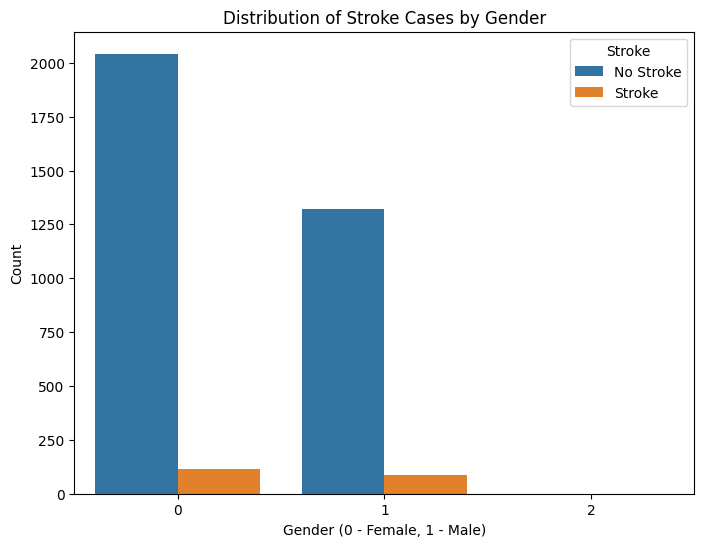

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Distribution of Stroke Cases by Gender')
plt.xlabel('Gender (0 - Female, 1 - Male)')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

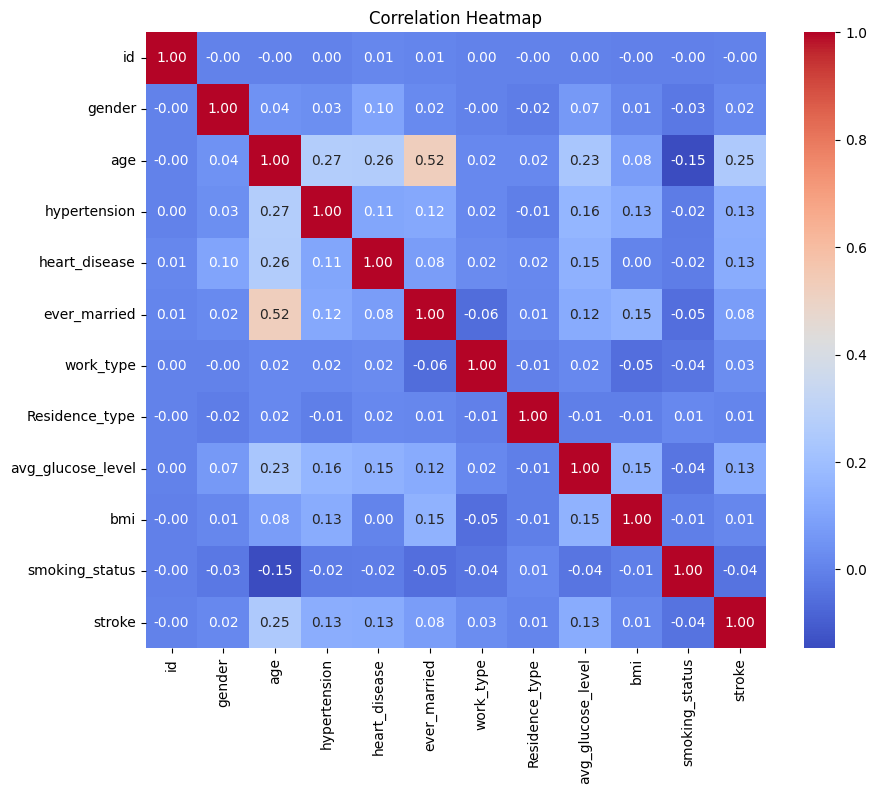

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

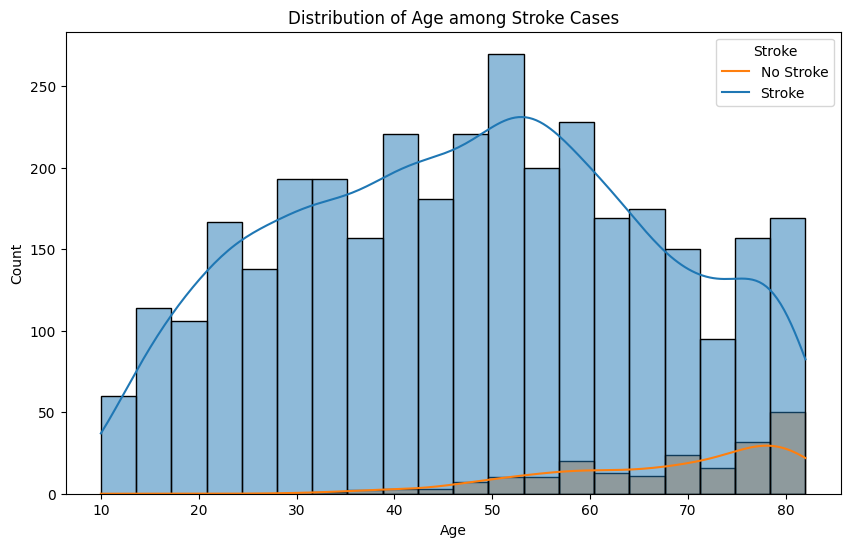

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=20)
plt.title('Distribution of Age among Stroke Cases')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

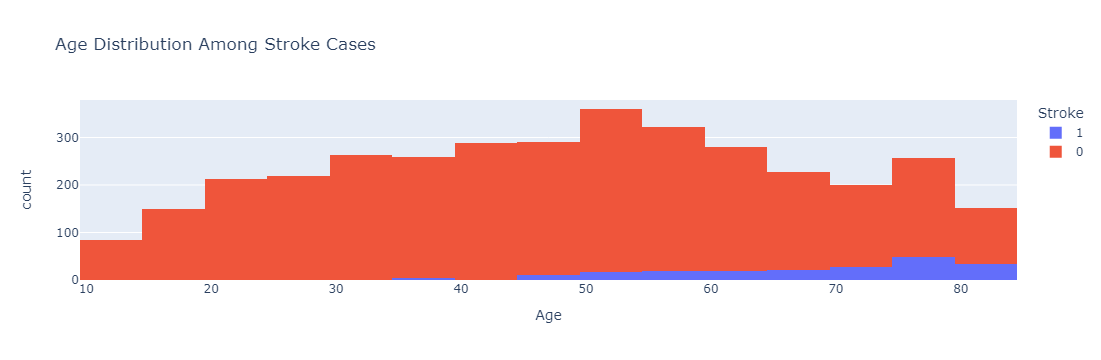

In [14]:
fig = px.histogram(df, x='age', color='stroke', nbins=20,
                   title='Age Distribution Among Stroke Cases',
                   labels={'age': 'Age', 'stroke': 'Stroke', 'count': 'Count'})
fig.show()

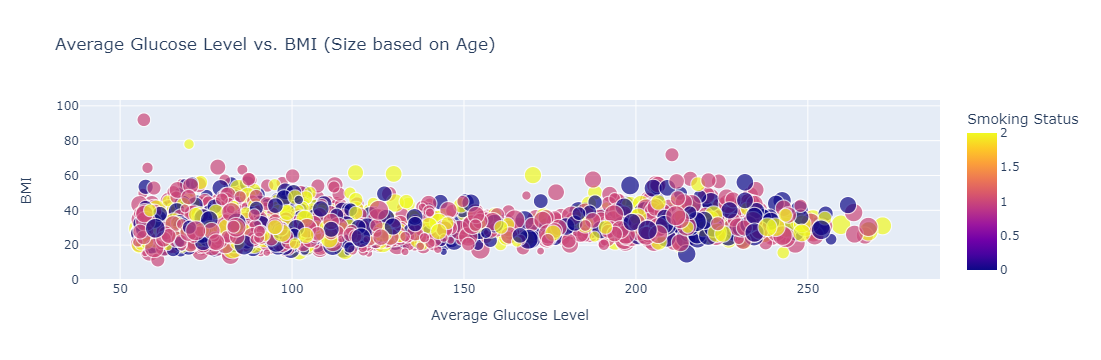

In [15]:
fig = px.scatter(df, x='avg_glucose_level', y='bmi', color='smoking_status', size='age',
                 title='Average Glucose Level vs. BMI (Size based on Age)',
                 labels={'avg_glucose_level': 'Average Glucose Level', 'bmi': 'BMI', 'age': 'Age', 'smoking_status': 'Smoking Status'},
                 hover_name='id')  
fig.show()

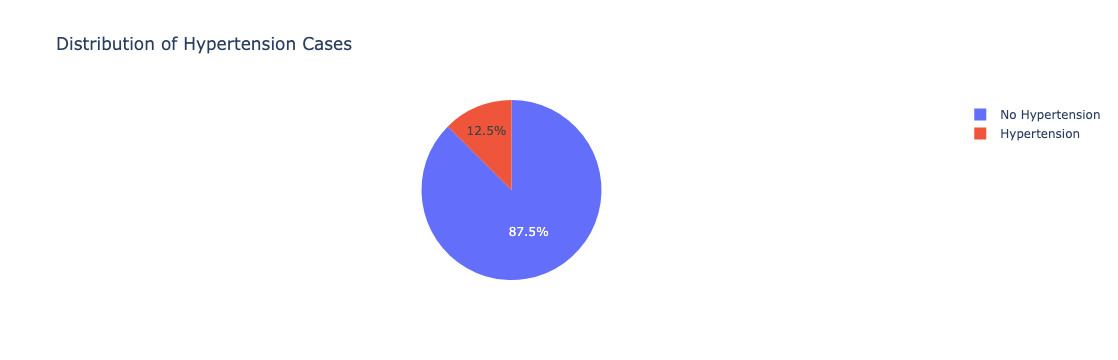

In [16]:
hypertension_counts = df['hypertension'].value_counts().reset_index()
hypertension_counts.columns = ['hypertension', 'count']

hypertension_counts['hypertension'] = hypertension_counts['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})


fig = px.pie(hypertension_counts, values='count', names='hypertension', 
             title='Distribution of Hypertension Cases',
             labels={'hypertension': 'Hypertension', 'count': 'Count'})
fig.show()

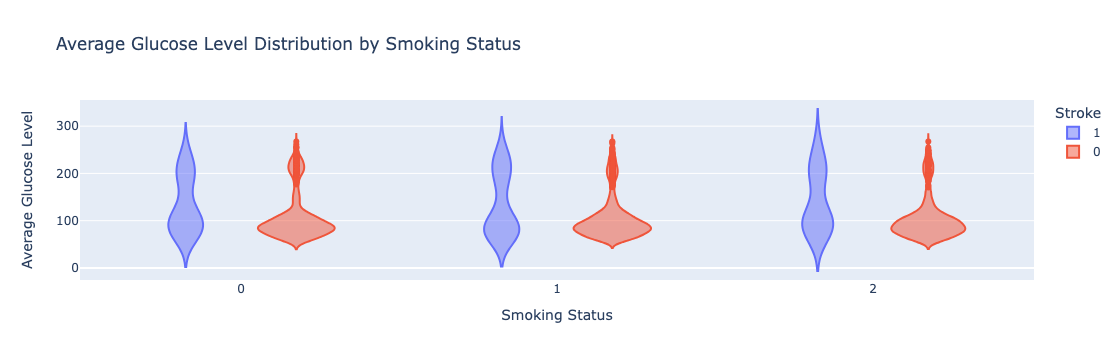

In [17]:
fig = px.violin(df, x='smoking_status', y='avg_glucose_level', color='stroke',
                title='Average Glucose Level Distribution by Smoking Status',
                labels={'smoking_status': 'Smoking Status', 'avg_glucose_level': 'Average Glucose Level', 'stroke': 'Stroke'})
fig.show()

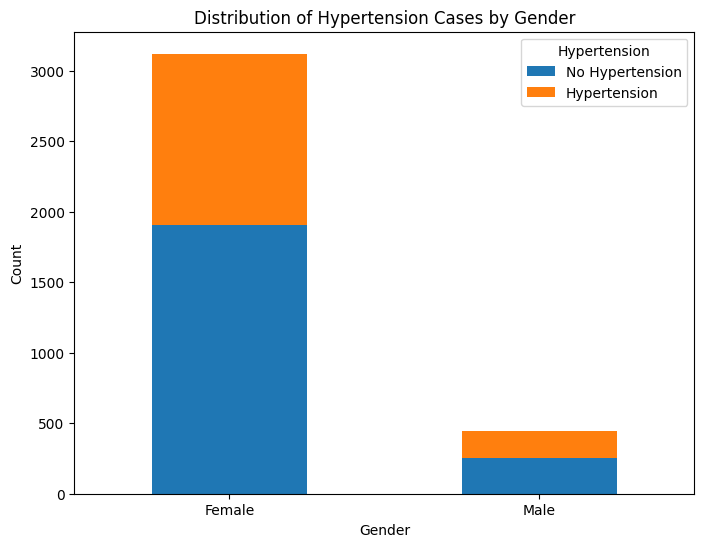

In [18]:
hypertension_gender_counts = df.groupby(['hypertension', 'gender']).size().unstack()

hypertension_gender_counts.rename(index={0: 'Female', 1: 'Male'}, inplace=True)

hypertension_gender_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribution of Hypertension Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Hypertension', labels=['No Hypertension', 'Hypertension'])
plt.xticks(rotation=0)
plt.show()

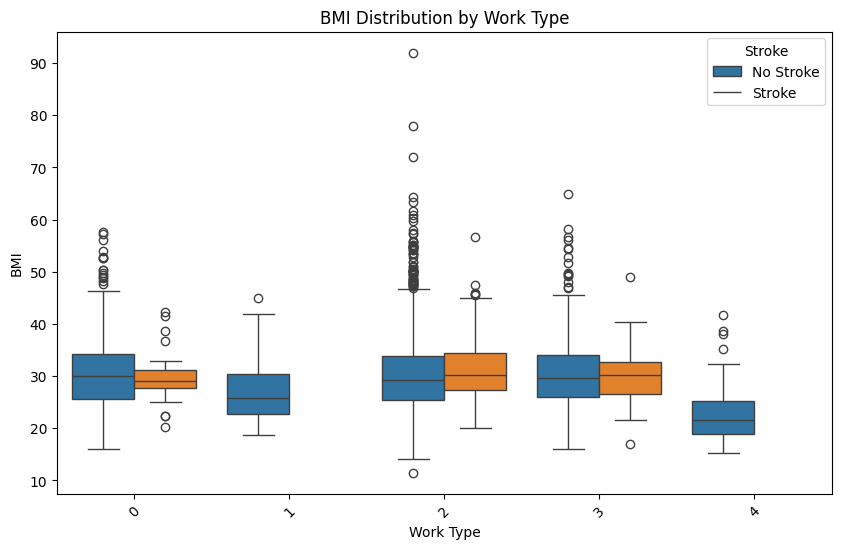

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_type', y='bmi', hue='stroke')
plt.title('BMI Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('BMI')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.show()

# 3) Graph Centralities

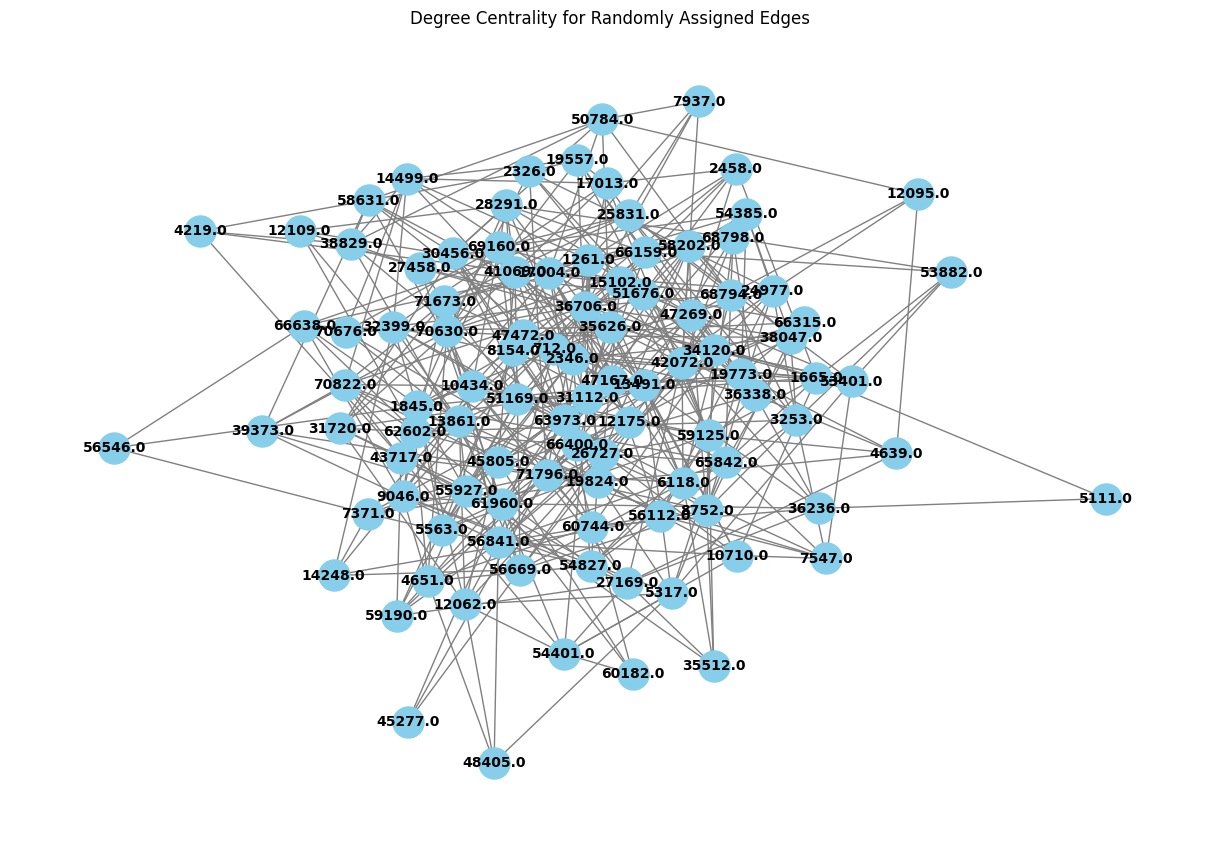

In [20]:
df1 = df.head(100)

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


G = nx.Graph()


for index, row in df1.iterrows():
    G.add_node(row['id'])

edge_probability = 0.1  

for i in range(len(df1)):
    for j in range(i + 1, len(df1)):
        if random.random() < edge_probability:
            G.add_edge(df1.iloc[i]['id'], df1.iloc[j]['id'])


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=1)
plt.title("Degree Centrality for Randomly Assigned Edges")
plt.show()


## Degree Centrality

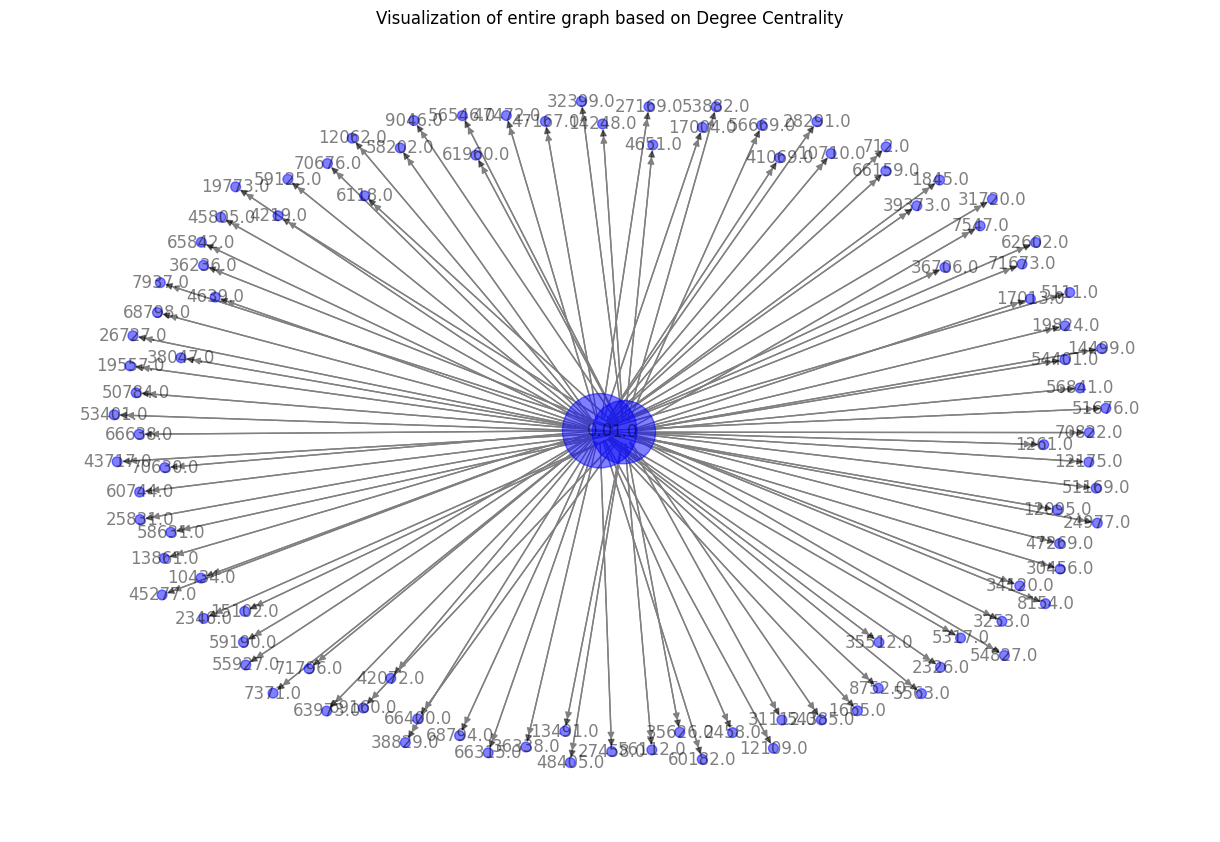

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df2=df.head(100)
G_full = nx.DiGraph()

for index, row in df2.iterrows():
    G_full.add_edge(row['gender'], row['id'], weight=row['stroke'])

degree_centrality = nx.degree_centrality(G_full)


def custom_layout(G):
    pos = nx.spring_layout(G, k=0.15, iterations=50)
    return pos


plt.figure(figsize=(12, 8))
pos = custom_layout(G_full)


node_size = [5000 * degree_centrality[node] for node in G_full.nodes()]
nx.draw(G_full, pos, node_size=node_size, node_color='blue', alpha=0.5, with_labels=True)


nx.draw_networkx_edges(G_full, pos, edge_color='gray')

plt.title("Visualization of entire graph based on Degree Centrality")
plt.show()


In [22]:
df2=df.head(100)
G_full = nx.DiGraph()

for index, row in df2.iterrows():
    G_full.add_edge(row['gender'], row['id'], weight=row['stroke'])

degree_centrality = nx.degree_centrality(G_full)

top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes based on Degree Centrality:")
for node, centrality in top_5_degree:
    print(f"Node {node}: {centrality}")

Top 5 nodes based on Degree Centrality:
Node 0.0: 0.5742574257425742
Node 1.0: 0.4158415841584158
Node 9046.0: 0.009900990099009901
Node 51676.0: 0.009900990099009901
Node 31112.0: 0.009900990099009901


## Betweenness centrality

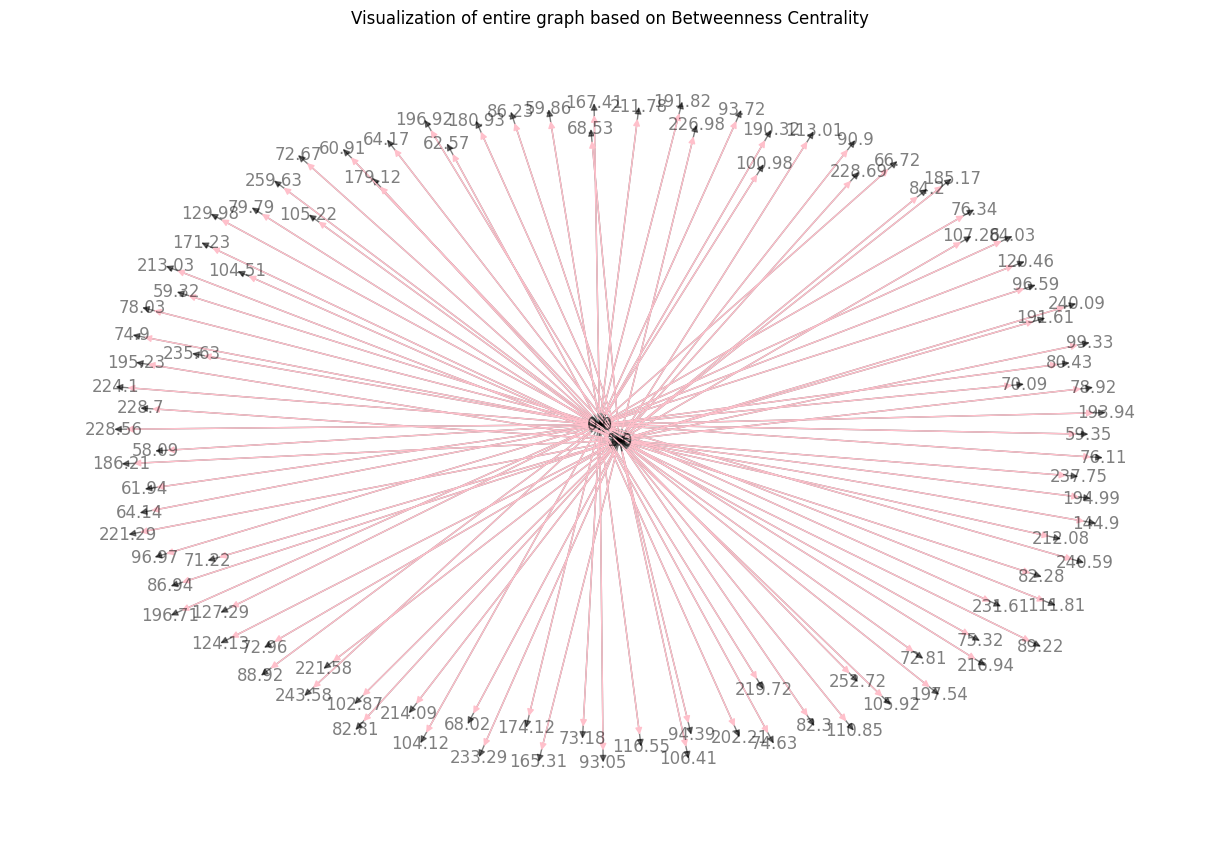

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G_full = nx.DiGraph()

for index, row in df2.iterrows():
    G_full.add_edge(row['Residence_type'], row['avg_glucose_level'], weight=row['stroke'])

betweenness_centrality = nx.betweenness_centrality(G_full)

def custom_layout(G):
    pos = nx.spring_layout(G, k=0.15, iterations=50)
    return pos

plt.figure(figsize=(12, 8))
pos = custom_layout(G_full)

node_size = [5000 * betweenness_centrality[node] for node in G_full.nodes()]
nx.draw(G_full, pos, node_size=node_size, node_color='blue', alpha=0.5, with_labels=True)

nx.draw_networkx_edges(G_full, pos, edge_color='pink')

plt.title("Visualization of entire graph based on Betweenness Centrality")
plt.show()


In [24]:
G_full = nx.DiGraph()

for index, row in df2.iterrows():
    G_full.add_edge(row['Residence_type'], row['avg_glucose_level'], weight=row['stroke'])

betweenness_centrality = nx.betweenness_centrality(G_full)

top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes based on Betweenness Centrality:")
for node, centrality in top_5_betweenness:
    print(f"Node {node}: {centrality}")

Top 5 nodes based on Betweenness Centrality:
Node 1.0: 0.0
Node 228.69: 0.0
Node 0.0: 0.0
Node 202.21: 0.0
Node 105.92: 0.0


## Closeness centrality

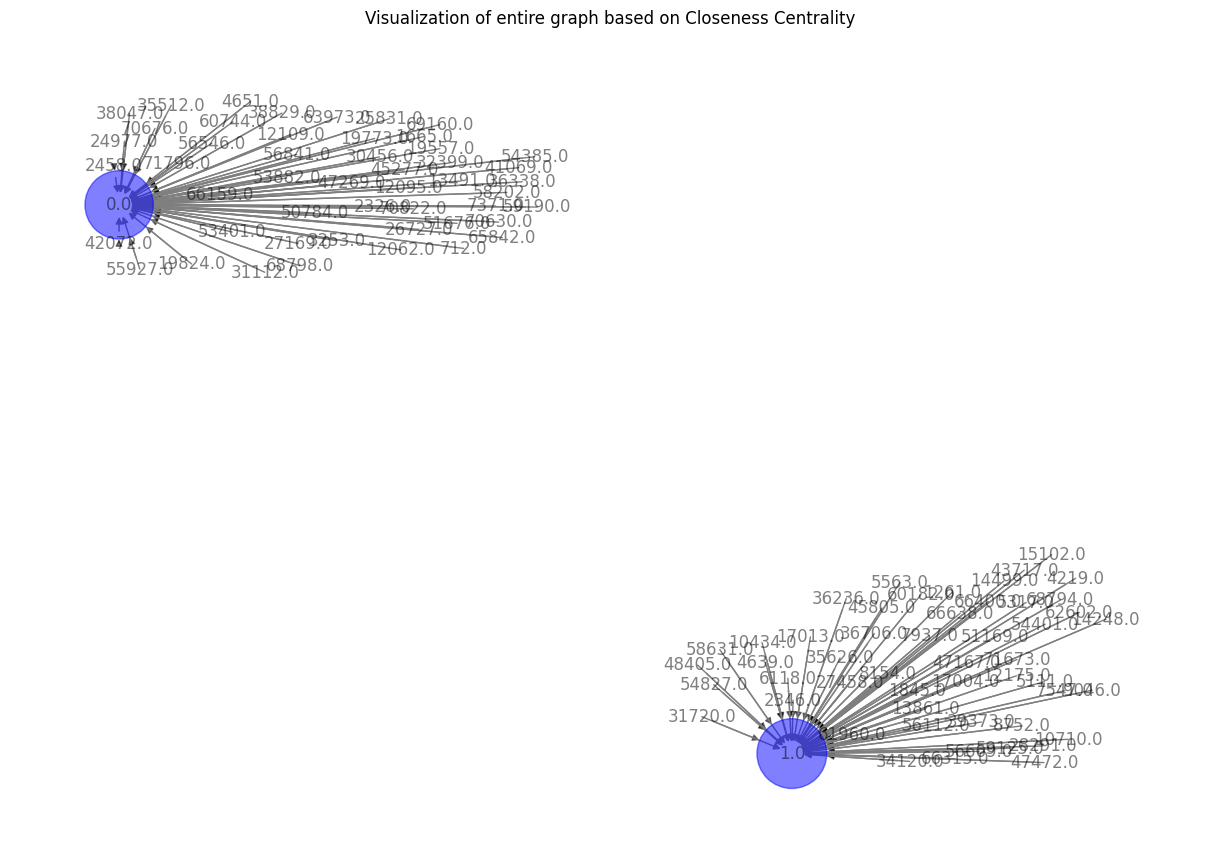

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


G_full = nx.DiGraph()


for index, row in df2.iterrows():
    G_full.add_edge(row['id'], row['Residence_type'], weight=row['stroke'])

closeness_centrality = nx.closeness_centrality(G_full)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_full, k=0.15, iterations=50)

node_size = [5000 * closeness_centrality[node] for node in G_full.nodes()]
nx.draw(G_full, pos, node_size=node_size, node_color='blue', alpha=0.5, with_labels=True)

nx.draw_networkx_edges(G_full, pos, edge_color='gray')

plt.title("Visualization of entire graph based on Closeness Centrality")
plt.show()


In [26]:
G_full = nx.DiGraph()


for index, row in df2.iterrows():
    G_full.add_edge(row['id'], row['Residence_type'], weight=row['stroke'])

closeness_centrality = nx.closeness_centrality(G_full)
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes based on closeness Centrality:")
for node, centrality in top_5_closeness:
    print(f"Node {node}: {centrality}")

Top 5 nodes based on closeness Centrality:
Node 1.0: 0.504950495049505
Node 0.0: 0.48514851485148514
Node 9046.0: 0.0
Node 51676.0: 0.0
Node 31112.0: 0.0


## Eigenvector Centrality

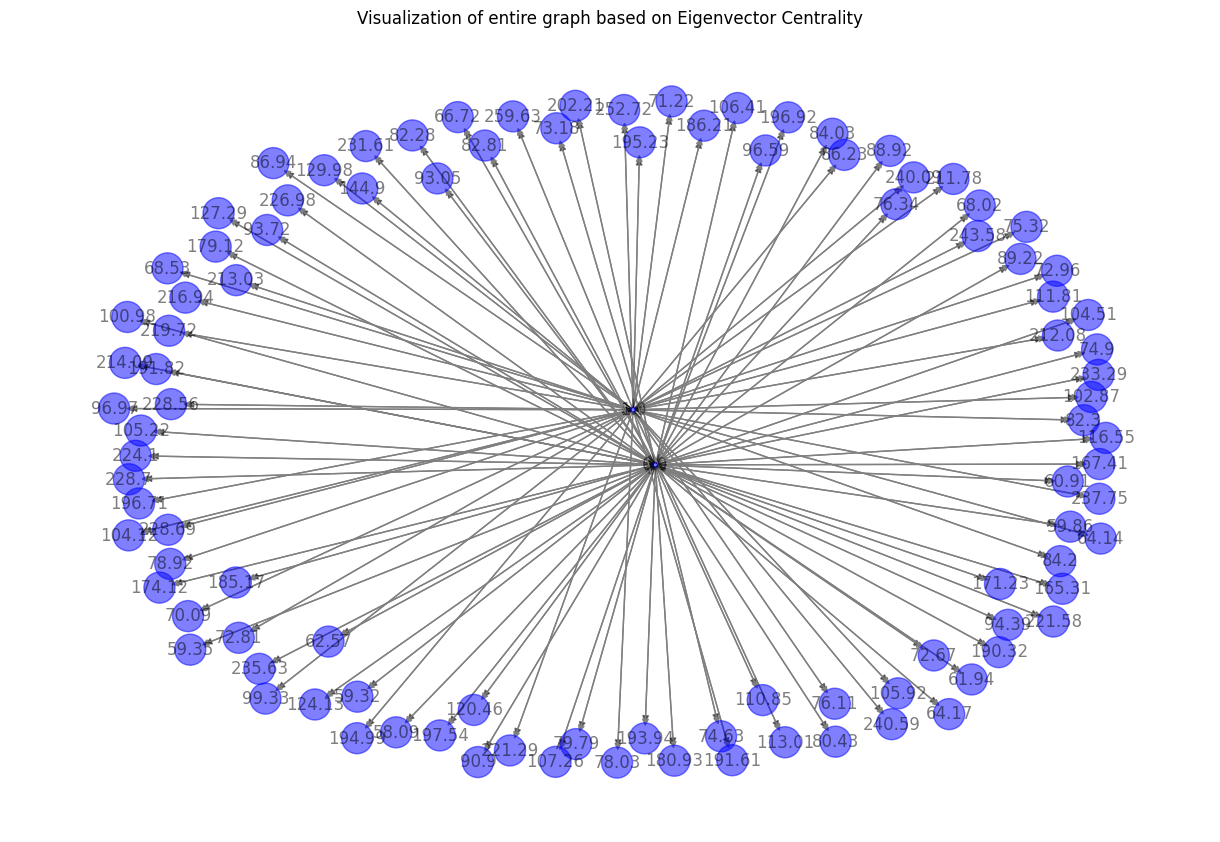

In [27]:
G_full = nx.DiGraph()


for index, row in df2.iterrows():
    G_full.add_edge(row['gender'], row['avg_glucose_level'], weight=row['Residence_type'])

eigenvector_centrality = nx.eigenvector_centrality(G_full)


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_full, k=0.15, iterations=50)


node_size = [5000 * eigenvector_centrality[node] for node in G_full.nodes()]
nx.draw(G_full, pos, node_size=node_size, node_color='blue', alpha=0.5, with_labels=True)


nx.draw_networkx_edges(G_full, pos, edge_color='gray')

plt.title("Visualization of entire graph based on Eigenvector Centrality")
plt.show()


In [28]:
G_full = nx.DiGraph()


for index, row in df2.iterrows():
    G_full.add_edge(row['gender'], row['avg_glucose_level'], weight=row['Residence_type'])

eigenvector_centrality = nx.eigenvector_centrality(G_full)
top_5_eigen = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes based on Eigenvector Centrality:")
for node, centrality in top_5_eigen:
    print(f"Node {node}: {centrality}")

Top 5 nodes based on Eigenvector Centrality:
Node 228.69: 0.09999952741355804
Node 202.21: 0.09999952741355804
Node 105.92: 0.09999952741355804
Node 171.23: 0.09999952741355804
Node 174.12: 0.09999952741355804


# 4) Machine Learning Models

In [29]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## Naive Bayes

In [30]:

X = df.drop(columns='stroke')
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy score of Naive Bayes classifier:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", class_report)


Accuracy score of Naive Bayes classifier: 0.9285714285714286
Precision: 0.125
Recall: 0.05128205128205128
F1-score: 0.07272727272727272

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       675
           1       0.12      0.05      0.07        39

    accuracy                           0.93       714
   macro avg       0.54      0.52      0.52       714
weighted avg       0.90      0.93      0.91       714



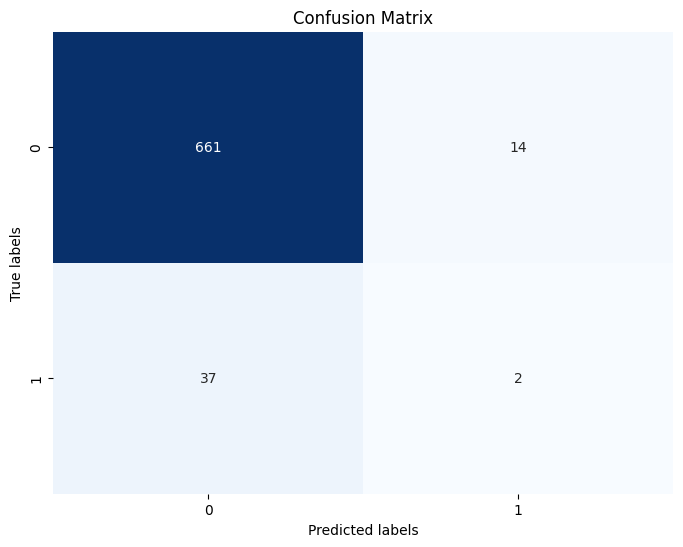

In [31]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [32]:


X = df.drop(columns='stroke')
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy score of Support Vector Machine:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", class_report)



Accuracy score of Support Vector Machine: 0.9425770308123249
Precision: 0.375
Recall: 0.07692307692307693
F1-score: 0.1276595744680851

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       675
           1       0.38      0.08      0.13        39

    accuracy                           0.94       714
   macro avg       0.66      0.53      0.55       714
weighted avg       0.92      0.94      0.92       714



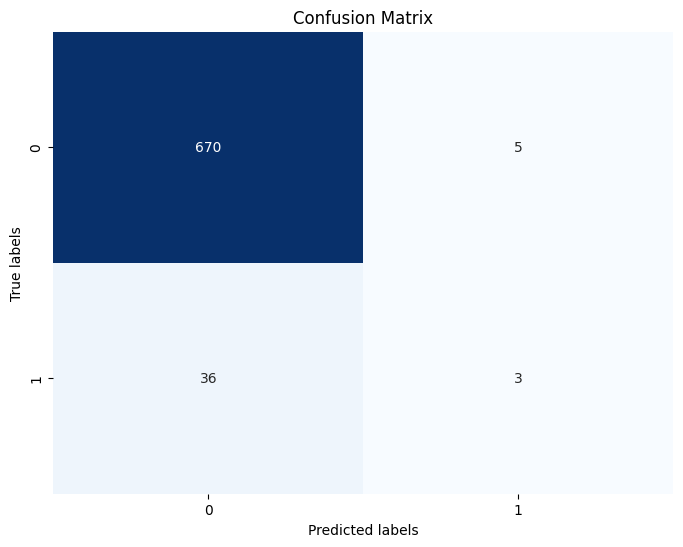

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [34]:
got_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
got_data.dropna(inplace=True)
got_data

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4909 rows x 12 columns]

In [35]:
from pyvis.network import Network
import pandas as pd
got_net = Network(notebook=True, height="750px", width="100%" , bgcolor="#222222" , font_color="white")

got_net.barnes_hut()
gender = got_data['bmi'].astype(str)
smoking = got_data['smoking_status']
age = got_data['age']

edge_data = zip(gender, smoking, age)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)
    
neighbor_map = got_net.get_adj_list()

for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "‹br>".join(neighbor_map[node["id"]])
    node ["value"] = len(neighbor_map[node["id"]])
    
got_net.show("healthnetwork.html")

healthnetwork.html


# 5) Graph Convolutional Network

In [40]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data, DataLoader
from sklearn.metrics.pairwise import cosine_similarity
from torch_geometric.nn import GCNConv, MessagePassing
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn.functional as F

features = ['age', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in columns_to_encode:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col])

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Warning: Unable to convert column '{col}' to numeric. Please handle it manually.")

df = df.select_dtypes(include=['float64', 'int64'])
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features] = (df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std()
cosine_sim = cosine_similarity(df.values)
threshold = 0.8
adjacency_matrix = (cosine_sim > threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)

edge_index = torch.tensor(np.nonzero(adjacency_matrix), dtype=torch.long)

class GCN(MessagePassing):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__(aggr='add')  
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = torch.nn.Dropout(0.5)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

x = torch.tensor(df.values, dtype=torch.float)
y = torch.tensor(df['stroke'].values, dtype=torch.long)
data = Data(x=x, y=y, edge_index=edge_index)
batch_size = 64
train_loader = DataLoader([data], batch_size=batch_size, shuffle=True)
model = GCN(input_dim=x.shape[1], hidden_dim=32, output_dim=2)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

def train_model(model, train_loader, optimizer, criterion, scheduler, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            output = model(batch.x, batch.edge_index)
            loss = criterion(output, batch.y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print('Epoch {}, Loss: {:.4f}'.format(epoch+1, avg_loss))
        scheduler.step(avg_loss)  

num_epochs = 10
train_model(model, train_loader, optimizer, criterion, scheduler, num_epochs)

def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    total_correct = 0
    with torch.no_grad():
        for batch in data_loader:
            output = model(batch.x, batch.edge_index)
            total_loss += criterion(output, batch.y).item()
            pred = output.argmax(dim=1, keepdim=True)
            total_correct += pred.eq(batch.y.view_as(pred)).sum().item()

    num_samples = len(data_loader.dataset)
    accuracy = total_correct / num_samples
    avg_loss = total_loss / len(data_loader)
    print(f'Accuracy: {accuracy:.4f}, Avg Loss: {avg_loss:.4f}')

evaluate_model(model, train_loader, criterion)

Epoch 1, Loss: 170.4770
Epoch 2, Loss: 10.6725
Epoch 3, Loss: 34.3190
Epoch 4, Loss: 46.1008
Epoch 5, Loss: 34.6371
Epoch 6, Loss: 39.0480
Epoch 7, Loss: 50.5567
Epoch 8, Loss: 49.8389
Epoch 9, Loss: 72.2699
Epoch 10, Loss: 55.8055
Accuracy: 3364.0000, Avg Loss: 54.5528
